<a href="https://colab.research.google.com/github/alandesson/MVP-PUC---Sprint-An-lise-de-Dados-e-Boas-Pr-ticas/blob/main/MVP_PUC_Sprint_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo:

A Bolsa de Valores Brasileira (B3) negocia ações de empresas de diversos setores da economia tecnologia, mineração, energia e agronegócio. Cada setor tem características próprias e responde de forma diferente a fatores econômicos, como inflação, juros e outros eventos do dia dia brasileiro e mundial. Esses comportamentos fazem com que as ações apresentem variações, que refletem as particularidades de cada setor e a performance das empresas que os compõem.

A análise dos diversos setores da B3 é fundamental para entender como e onde investir. Pois avaliando as acoes e os setores da bolsa podemos entender as dinâmicas de cada setor, como eles reagiram a diferentes cenários econômicos, e ajuda a traçar tendências futuras. Compreender essas movimentações é essencial para investidores, empresas e economistas que buscam antecipar oportunidades e riscos.

Este projeto tem como objetivo investigar o desempenho dos diferentes setores da bolsa nos últimos cinco anos, com foco nas ações que registraram o maior crescimento e rendimento. A partir dessa análise, será possível apresentar de forma clara quais foram as ações e setores mais promissores e suas perspectivas para o futuro.

Em resumo, este projeto prentede fazer uma analise descritiva dos dados coletados para responder às seguintes questões:

1. Como é a distribuição das ações entre os setores?
2. Quais ações tiveram o maior crescimento?
3. Qual setor apresentou o maior e o menor crescimento?
4. Quais ações tiveram o melhor desempenho em cada setor?
5. Qual foi o crescimento dos setores ao longo dos anos?

Em seguida fazer o Pré-processamento de dados e preparar a base para um apredizado supervisionado para prever resultado de ações com base em seus setores e variação de preço.







##Coleta de Dados:

Para obter os dados de valor da ações por dia utilizei a biblioteca do python yfinance, ela é uma biblioteca opensource que utiliza a api de finanças do yahoo para obter seus dados.

A seguir temos um exemplo de como utilizar a biblioteca para extrair os dados do ano de 2023 para ações da Petrobras:


In [1]:
!pip install --upgrade scikit-learn
!pip install investpy

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import yfinance as yf
import numpy as np
import missingno as ms # para tratamento de missings
## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
## Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 23.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.7 MB/s eta 0:00:00
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481565 sha256=e1e4e6c4f60a2687d42bea4a9751249af9e817f38c8b577b7018ac5ae078127c
  Stored in directory: /root/.cache/pip/wheels/db/f4/ae/980b93b0257620bc8e4afc98a854a7a746a33eb8335fd07906
Successfully built investpy


In [2]:
ticker = "PETR4.SA"
start_date = "2023-01-01"
end_date = "2023-12-31"

stock_data = yf.download(ticker, start=start_date, end=end_date)

min_price = stock_data['Low'].min()
avg_price = stock_data['Close'].mean()
max_price = stock_data['High'].max()

total_volume = stock_data['Volume'].sum()

# Print the results
print(f"\nValor mínimo das ações: R${min_price:.2f}")
print(f"Valor final das ações: R${avg_price:.2f}")
print(f"Valor máximo das ações: R${max_price:.2f}")
print(f"Volume total de ações vendidas: {total_volume}")

info = yf.Ticker(ticker)
print(f"Moeda: {info.info['currency']}")
print(stock_data.head())



[*********************100%***********************]  1 of 1 completed


Valor mínimo das ações: R$21.83
Valor final das ações: R$29.69
Valor máximo das ações: R$38.86
Volume total de ações vendidas: 14176715400
Moeda: BRL
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2023-01-02  23.540001  23.809999  22.799999  22.920000  15.593501   78424700
2023-01-03  22.940001  23.100000  22.129999  22.340000  15.198901   96750300
2023-01-04  21.959999  23.590000  21.830000  23.049999  15.681946  129504000
2023-01-05  23.340000  24.040001  23.150000  23.879999  16.246632   73886000
2023-01-06  23.940001  24.320000  23.549999  23.740000  16.151382   51851500


O próximo passo é obter a lista de ações da bolsa de valores brasiliera para que possamos montar e analisar nossa base de dados. No entanto, se você observar no exemplo acima utilizamos o ticker (codigo que representa ação de uma dada empresa). Logo, precisamos de uma forma de obter um conjunto de tickers, para obter esses dados vamos utilizar o pacote investpy. Esse pacote é gratis e sem limitações e é capaz de recuperar dados do Investing.com, que fornece dados de até 39.952 ações, 82.221 fundos, 11.403 ETFs, 2.029 cruzamentos de moedas, 7.797 índices, 688 títulos, 66 commodities, 250 certificados e 4.697 criptomoedas.

In [3]:
import logging

'''
  Passo opcional para suprimir erros do yfinance, o yfinance ainda não atualizou
sua base de informações de ticker para empresas que entraram na bolsa em 2023

  obs.: os erros gerados não vão impactar o trabalho, pois são empresas novas e
ou delistadas o estudo visa comparar dados de empresas que estão a pelo menos
5 anos na bolsa
'''
logger = logging.getLogger('yfinance')
logger.disabled = True
logger.propagate = False

In [4]:
import investpy
import pandas as pd
import yfinance as yf


# Função para obter todos os tickers da bolsa brasileira (B3)
def getTodosTickersBrasileiros():
    stocks = investpy.stocks.get_stocks(country='brazil')
    tickers = stocks['symbol'].tolist()
    return tickers

def getTickerInfo(ticker):
    stock = yf.Ticker(ticker + ".SA")
    info = stock.info
    # print(info)
    return {
        "nome": info.get("longName", "N/A"),
        "setor": info.get("sector", "N/A"),
        "indústria": info.get("industry", "N/A"),
        "data_entrada_bolsa": info.get("firstTradeDateEpochUtc", "N/A")
    }


# Obtendo a lista de Tickers Brasileiros
tickers = getTodosTickersBrasileiros()

# Obtendo Informações da empresa para cada Ticker
stock_info = []
for ticker in tickers:
    ticker_info = getTickerInfo(ticker)
    if ticker_info:
        stock_info.append({
            "Ticker": ticker,
            "Nome": ticker_info["nome"],
            "Setor": ticker_info["setor"],
            "Indústria": ticker_info["indústria"],
            "Data": ticker_info["data_entrada_bolsa"]
        })

print("Lista de Tickers:")
print(tickers)
print("\nInfo dos 5 primeiros Tickers:")
print(stock_info[:5])

Lista de Tickers:
['ABCB4', 'AGRO3', 'RAIL3', 'ALPA3', 'ALPA4', 'ALSO3', 'AMAR3', 'ABEV3', 'ADHM3', 'ARZZ3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBRK3', 'BEEF3', 'BPHA3', 'BPAN4', 'BRAP3', 'BRAP4', 'BRFS3', 'APER3', 'BRKM3', 'BRKM5', 'BRML3', 'BRPR3', 'BRSR6', 'OIBR3', 'OIBR4', 'BTOW3', 'B3SA3', 'CAMB4', 'CARD3', 'CCPR3', 'CCRO3', 'CEDO4', 'CEED3', 'CESP6', 'CGAS5', 'CGRA4', 'CIEL3', 'CMIG3', 'CMIG4', 'COCE5', 'CPFE3', 'CPLE3', 'CPLE6', 'CRDE3', 'CSAN3', 'CSMG3', 'CSNA3', 'LIQO3', 'CTNM4', 'CYRE3', 'DASA3', 'DIRR3', 'DTEX3', 'ECOR3', 'EEEL3', 'ELEK4', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'ENGI4', 'EQTL3', 'YDUQ3', 'ETER3', 'EUCA4', 'EVEN3', 'EZTC3', 'FESA4', 'FHER3', 'TASA4', 'FLRY3', 'FRIO3', 'TIET3', 'TIET4', 'GFSA3', 'GGBR3', 'GGBR4', 'GOAU3', 'GOAU4', 'GOLL4', 'GRND3', 'GSHP3', 'HBOR3', 'HGTX3', 'PRIO3', 'HYPE3', 'IDNT3', 'IDVL4', 'IGTA3', 'MEAL3', 'INEP3', 'INEP4', 'ITSA3', 'ITSA4', 'ITUB3', 'ITUB4', 'JBSS3', 'JFEN3', 'JHSF3', 'JSLG3', 'KEPL3', 'KLBN4', 'LAME3', 'LAME4', 'LEVE3', 'LIGT3', 

Para finalizar a etapa de coleta de dados e concluir a construção da nossa base, de forma que possamos avançar para a descrição, visualização e pré-processamento dos dados, precisamos utilizar o exemplo inicial criado para recuperar os dados de transações financeiras dos tickers, em que obtivemos os dados da Petrobras no período de janeiro a dezembro de 2023.

In [5]:
def downloadTickerData(ticker, start_date="2019-01-01", end_date="2024-12-31"):
    try:
        stock_data = yf.download(ticker, start=start_date, end=end_date)
        stock_data["Ticker"] = ticker

        return stock_data
    except KeyError:
        print("Ticker Key error!", ticker)
        return None

stock_price = None
for stock in stock_info:
    price_info = downloadTickerData(stock["Ticker"]+".SA")

    if stock_price is None:
      stock_price = price_info
      continue

    if price_info is not None:
        stock_price = pd.concat([stock_price, price_info])

stock_price = stock_price.reset_index()
print(stock_price.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Ticker Key error! CCPR3.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker Key error! CCRO3.SA
Ticker Key error! CEDO4.SA
Ticker Key error! CEED3.SA


[*********************100%***********************]  1 of 1 completed


Ticker Key error! CESP6.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker Key error! CGAS5.SA
Ticker Key error! CGRA4.SA
Ticker Key error! CIEL3.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Ticker Key error! CMIG3.SA
Ticker Key error! CMIG4.SA



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker Key error! COCE5.SA
Ticker Key error! CPFE3.SA
Ticker Key error! CPLE3.SA


[*********************100%***********************]  1 of 1 completed


Ticker Key error! CPLE6.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker Key error! CSAN3.SA
Ticker Key error! CSMG3.SA
Ticker Key error! CSNA3.SA


[*********************100%***********************]  1 of 1 completed


Ticker Key error! LIQO3.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker Key error! CTNM4.SA
Ticker Key error! CYRE3.SA
Ticker Key error! DASA3.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker Key error! DIRR3.SA
Ticker Key error! DTEX3.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker Key error! ECOR3.SA
Ticker Key error! EEEL3.SA


[*********************100%***********************]  1 of 1 completed


Ticker Key error! ELEK4.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker Key error! ELET3.SA
Ticker Key error! ELET6.SA
Ticker Key error! EMBR3.SA


[*********************100%***********************]  1 of 1 completed


Ticker Key error! ENBR3.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker Key error! ENGI4.SA
Ticker Key error! EQTL3.SA
Ticker Key error! YDUQ3.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker Key error! ETER3.SA
Ticker Key error! EUCA4.SA
Ticker Key error! EVEN3.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker Key error! EZTC3.SA
Ticker Key error! FESA4.SA
Ticker Key error! FHER3.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker Key error! TASA4.SA
Ticker Key error! FLRY3.SA
Ticker Key error! FRIO3.SA


[*********************100%***********************]  1 of 1 completed


Ticker Key error! TIET3.SA


[*********************100%***********************]  1 of 1 completed


Ticker Key error! TIET4.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker Key error! GFSA3.SA
Ticker Key error! GGBR3.SA
Ticker Key error! GGBR4.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker Key error! GOAU3.SA
Ticker Key error! GOAU4.SA
Ticker Key error! GRND3.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker Key error! GSHP3.SA
Ticker Key error! HBOR3.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker Key error! PRIO3.SA
Ticker Key error! HYPE3.SA
Ticker Key error! IDNT3.SA


[*********************100%***********************]  1 of 1 completed


Ticker Key error! IDVL4.SA


[*********************100%***********************]  1 of 1 completed


Ticker Key error! IGTA3.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker Key error! MEAL3.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

        Date       Open       High        Low      Close  Adj Close    Volume  \
0 2019-01-02  16.026621  16.736967  15.909851  16.659122  11.902557  587516.0   
1 2019-01-03  16.668854  16.688314  16.425583  16.639660  11.888650  383935.0   
2 2019-01-04  16.629929  16.668854  16.435314  16.493698  11.784365  306244.0   
3 2019-01-07  16.493698  16.678583  16.445044  16.542353  11.819127  453508.0   
4 2019-01-08  16.591005  16.931583  16.445044  16.853739  12.041607  584741.0   

     Ticker  
0  ABCB4.SA  
1  ABCB4.SA  
2  ABCB4.SA  
3  ABCB4.SA  
4  ABCB4.SA  


# Estatísticas descritivas:

Nessa etapa vamos analisar os dados coletados, os dados coletados estão armazenados em duas variaveis ***stock_info*** e ***stock_price***. Vamos começar avaliando o ***stock_info*** seguindo as seguintes questionamentos:

 1. Quantos atributos e instâncias existem?
 2. Quais são os tipos de dados dos atributos?
 3. Há valores faltantes, discrepantes ou inconsistentes?
 4. Para os valores numéricos, qual o mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes?

In [6]:
import datetime
import pandas as pd

# Número de atributos
num_attributes = len(stock_info[0])

# Número de instâncias
num_instances = len(stock_info)

#convertendo para dataframe
stock_info_df = pd.DataFrame(stock_info)

# Contar valores ausentes
missing_values = stock_info_df.isnull().sum()

# valores inconsistentes
inconsistentes = stock_info_df[stock_info_df['Setor'] == 'N/A']
print(inconsistentes.head())
print(f"\nquantidade de valores inconsistentes {len(inconsistentes['Setor'])} \n")

#removendo valores inconsistentes
stock_info_df = stock_info_df[stock_info_df['Setor'] != 'N/A']

# Único valor número é a Data que e está em epoch time
stock_info_df['Data'] = pd.to_numeric(stock_info_df['Data'], errors='coerce')
# Cálculo do mínimo, máximo, mediana, moda, média e desvio padrão
min_val = stock_info_df['Data'].min()
max_val = stock_info_df['Data'].max()
mode_val = stock_info_df['Data'].mode().iloc[0]  # Obtém a primeira moda
median_val = stock_info_df['Data'].median()
mean_val = stock_info_df['Data'].mean()
std_val = stock_info_df['Data'].std()

# Contar valores ausentes
# missing_values = stock_info_df.isnull().sum()

min_val_date = datetime.datetime.fromtimestamp(min_val).strftime('%d/%m/%Y')
max_val_date = datetime.datetime.fromtimestamp(max_val).strftime('%d/%m/%Y')
median_val_date = datetime.datetime.fromtimestamp(median_val).strftime('%d/%m/%Y')
mode_val_date = datetime.datetime.fromtimestamp(mode_val).strftime('%d/%m/%Y')
mean_val_date = datetime.datetime.fromtimestamp(mean_val).strftime('%d/%m/%Y')
std_val_date = datetime.datetime.fromtimestamp(std_val).strftime('%d/%m/%Y')

print("\n")
print(f"Número de atributos: {num_attributes}")
print(f"Número de instâncias: {num_instances}")
print(f"Impresa mais antiga: {min_val} - {min_val_date}")
print(f"Impresa mais nova  : {max_val} - {max_val_date}")
print(f"Data media: {mean_val} - {mean_val_date}")
print(f"Data maior quantidade de empresas entraram na bolsa: {mode_val} - {mode_val_date}")
print(f"Desvio padrao da entrada de empresas na bolsa: {std_val}")


print(f"\nValores ausentes: {missing_values}")


   Ticker                                              Nome Setor Indústria  \
5   ALSO3                                               N/A   N/A       N/A   
8   ADHM3  Advanced Digital Health Medicina Preventiva S.A.   N/A       N/A   
13  BBRK3                                               N/A   N/A       N/A   
15  BPHA3                                Brasil Pharma S.A.   N/A       N/A   
23  BRML3                                               N/A   N/A       N/A   

          Data  
5          N/A  
8   1271422800  
13         N/A  
15  1311598800  
23         N/A  

quantidade de valores inconsistentes 257 



Número de atributos: 5
Número de instâncias: 749
Impresa mais antiga: 946900800 - 03/01/2000
Impresa mais nova  : 1719838800 - 01/07/2024
Data media: 1229456312.195122 - 16/12/2008
Data maior quantidade de empresas entraram na bolsa: 946900800 - 03/01/2000
Desvio padrao da entrada de empresas na bolsa: 216916263.53629276

Valores ausentes: Ticker       0
Nome         0
Setor

In [7]:
stock_info_df.head()

,Ticker,Nome,Setor,Indústria,Data
0,ABCB4,Banco ABC Brasil S.A.,Financial Services,Banks - Regional,1190811600
1,AGRO3,BrasilAgro - Companhia Brasileira de Proprieda...,Consumer Defensive,Farm Products,1146574800
2,RAIL3,Rumo S.A.,Industrials,Railroads,1427979600
3,ALPA3,Alpargatas S.A.,Consumer Cyclical,Footwear & Accessories,946900800
4,ALPA4,Alpargatas S.A.,Consumer Cyclical,Footwear & Accessories,1199275200


Ao analisar o ***stock_info*** notamos que ele possui alguns valores inconsistens. Como o objetivo é realizar uma analise por setor, foi necessário remover os elementos cujo setor é desconhecido. Notamos também que que no ***stock_info*** temos: dados de , que entraram na bolsa de 2000 até 2024. Além disso podemos notar que:

1. 749 empresas
2. 257 empresas com dados inconsistens
3. 5 atributos
  - Ticker: String que funciona com ID para empresa
  - Nome: String que representa o nome da Empresa
  - Indústria: String Categorica
  - Setor: String Categorica
  - Data: Numerio representando Data em epoch time

Agora podemos começar avaliar o ***stock_price*** seguindo os mesmos critérios.

In [8]:
stock_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2019-01-02,16.026621,16.736967,15.909851,16.659122,11.902557,587516.0,ABCB4.SA
1,2019-01-03,16.668854,16.688314,16.425583,16.639660,11.888650,383935.0,ABCB4.SA
2,2019-01-04,16.629929,16.668854,16.435314,16.493698,11.784365,306244.0,ABCB4.SA
3,2019-01-07,16.493698,16.678583,16.445044,16.542353,11.819127,453508.0,ABCB4.SA
4,2019-01-08,16.591005,16.931583,16.445044,16.853739,12.041607,584741.0,ABCB4.SA


In [9]:
stock_price = stock_price.reset_index()
print(stock_price.columns)
print(stock_price[stock_price['Date'] == '2019-01-02'])

Index(['index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Ticker'],
      dtype='object')
         index       Date         Open         High          Low        Close  \
0            0 2019-01-02    16.026621    16.736967    15.909851    16.659122   
1430      1430 2019-01-02    15.800000    16.000000    15.410000    15.950000   
2860      2860 2019-01-02    16.709999    17.090000    16.680000    16.950001   
4290      4290 2019-01-02    12.960000    13.440000    12.960000    13.440000   
5720      5720 2019-01-02    13.613490    14.029169    13.581515    13.989200   
...        ...        ...          ...          ...          ...          ...   
706643  706643 2019-01-02  1000.000000  1000.000000  1000.000000  1000.000000   
708720  708720 2019-01-02   121.190002   121.190002   121.190002   121.190002   
709582  709582 2019-01-02    31.020000    31.049999    29.969999    30.000000   
714991  714991 2019-01-02    81.000000    81.000000    81.000000    81.

In [10]:
def calcEstatisticas(df, coluna):
	# Cálculo do mínimo, máximo, mediana, moda, média e desvio padrão
	min_val = df[coluna].min()
	max_val = df[coluna].max()
	median_val = df[coluna].median()
	mode_val = df[coluna].mode().iloc[0]  # Obtém a primeira moda
	mean_val = df[coluna].mean()
	std_val = df[coluna].std()

	# Contar valores ausentes
	missing_values = df[coluna].isnull().sum()

	# Exibir os resultados
	print(f"-- Resultado Coluna {coluna} --")
	print(f"Mínimo: {min_val}")
	print(f"Máximo: {max_val}")
	print(f"Mediana: {median_val}")
	print(f"Moda: {mode_val}")
	print(f"Média: {mean_val}")
	print(f"Desvio Padrão: {std_val}")
	print(f"Número de valores ausentes: {missing_values}\n")

calcEstatisticas(stock_price, "Open")
calcEstatisticas(stock_price, "Close")
calcEstatisticas(stock_price, "Low")
calcEstatisticas(stock_price, "High")
calcEstatisticas(stock_price, "Adj Close")
calcEstatisticas(stock_price, "Volume")

# Número de atributos
num_attributes = len(stock_price.columns)

# Número de instâncias
num_instances = len(stock_price)

print(f"Número de atributos: {num_attributes}")
print(f"Número de instâncias: {num_instances}")

-- Resultado Coluna Open --
Mínimo: 0.00039999998989515007
Máximo: 16810.0
Mediana: 33.20000076293945
Moda: 1000.0
Média: 128.48183276505057
Desvio Padrão: 477.5251967141275
Número de valores ausentes: 0

-- Resultado Coluna Close --
Mínimo: 0.00039999998989515007
Máximo: 16460.0
Mediana: 33.188955307006836
Moda: 1000.0
Média: 128.40127535919657
Desvio Padrão: 476.76234458914865
Número de valores ausentes: 0

-- Resultado Coluna Low --
Mínimo: 0.00033000000985339284
Máximo: 16270.0
Mediana: 32.900001525878906
Moda: 1.5
Média: 127.41153858539498
Desvio Padrão: 470.12618170281723
Número de valores ausentes: 0

-- Resultado Coluna High --
Mínimo: 0.00039999998989515007
Máximo: 16900.0
Mediana: 33.599998474121094
Moda: 1000.0
Média: 129.4635616713421
Desvio Padrão: 483.9835476351127
Número de valores ausentes: 0

-- Resultado Coluna Adj Close --
Mínimo: -14.123250961303711
Máximo: 11338.2177734375
Mediana: 31.88754940032959
Moda: 1000.0
Média: 115.02490727108328
Desvio Padrão: 325.82554074

In [11]:
stock_price[stock_price['Adj Close'] == -4791500013568.0]

,index,Date,Open,High,Low,Close,Adj Close,Volume,Ticker


Ao analisar o ***stock_price***, notamos que ele possui alguns valores que parecem inconsistentes, como valores negativos para *Adj Close*. No entanto, isso se deve à forma como é calculado, pois essa conta envolve a dedução de custos de dividendos e desdobramentos de ações. Notamos também que, no ***stock_info***, temos dados de empresas que já estão fora da bolsa, ou seja, precisamos tratar esses dados para remover ações que não estão mais listadas para compra. Em resumo, temos:



1. 800122 registros dividos entre as 913 empresas (cujo 749 possuem dados consistentes em ***stock_info***.
2. 164 empresas com dados inconsistens
3. 8 atributos
  - Date: Data representada no formato *YYYY-MM-DD*
  - Ticker: String que funciona com ID para empresa
  - Open: Campo Numérico que representa o valor da ação no momento da abertura da bolsa
  - High: Campo Numérico que representa o valor máximo da ação no dia
  - Low: Campo Numérico que representa o valor minimo da ação no dia
  - Close: Campo Numérico que representa o valor da ação no momento da fechamento da bolsa
  - Adj Close: Campo Numérico que representa o valor da ação após ajuste do preço.
  - Volume: Campo Numérico que representa a quantidade de ações negociadas.
  


# Visualizando os Dados:

Nessa etapa vamos criar as primeiras visualizações para facilitar a avaliação dos nossos dados. Primeiramente vamos tentar gerar pespectivas que facilitem a analise do conjundo de dados ***stock_info*** e ***stock_price***.

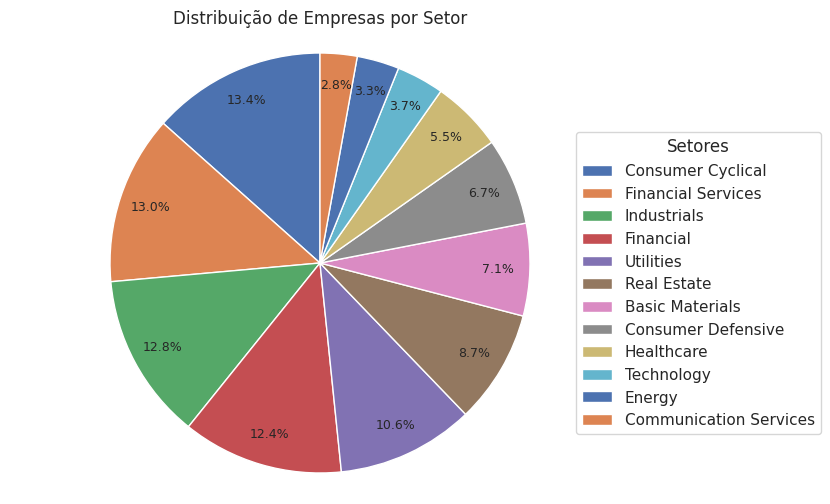

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

setor_counts = stock_info_df['Setor'].value_counts()
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Criando o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(setor_counts,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85,
        textprops={'fontsize': 9})  # Usando a paleta de cores do Seaborn

# Adicionando a legenda
plt.legend(setor_counts.index, title='Setores', loc='upper left', bbox_to_anchor=(0.9, 0.8))

plt.title('Distribuição de Empresas por Setor')
plt.axis('equal')  # Para garantir que o gráfico seja um círculo

plt.show()

Analisando o gráfico podemos ver que o maior número de empresas na bolsa são empresas da area de *Consumer Cyclical*, essa area é a area de produtos de consumo como havianas, roupas, toalhas, entre outros.

In [13]:
stock_info_df[stock_info_df['Setor'] == 'Consumer Cyclical'].head(10)

,Ticker,Nome,Setor,Indústria,Data
3,ALPA3,Alpargatas S.A.,Consumer Cyclical,Footwear & Accessories,946900800
4,ALPA4,Alpargatas S.A.,Consumer Cyclical,Footwear & Accessories,1199275200
6,AMAR3,Marisa Lojas S.A.,Consumer Cyclical,Apparel Retail,1193054400
9,ARZZ3,Arezzo Indústria e Comércio S.A.,Consumer Cyclical,Footwear & Accessories,1296648000
34,CEDO4,Companhia de Fiação e Tecidos Cedro e Cachoeir...,Consumer Cyclical,Textile Manufacturing,1199361600
38,CGRA4,Grazziotin S.A.,Consumer Cyclical,Department Stores,946900800
51,CTNM4,Companhia de Tecidos Norte de Minas,Consumer Cyclical,Textile Manufacturing,946900800
52,CYRE3,Cyrela Brazil Realty S.A. Empreendimentos e Pa...,Consumer Cyclical,Residential Construction,946900800
74,FRIO3,Metalfrio Solutions S.A.,Consumer Cyclical,"Furnishings, Fixtures & Appliances",1176469200
77,GFSA3,Gafisa S.A.,Consumer Cyclical,Residential Construction,1060952400


       Ticker  preco_inicio    preco_fim  Crescimento
0   LMTB34.SA   1007.539978  3174.540039  2167.000061
1   BVAR11.SA      0.210000  1417.400024  1417.190024
2   ACNB34.SA    547.979980  1942.050049  1394.070068
3   GDBR34.SA    598.500000  1641.410034  1042.910034
4   FDXB34.SA    617.010010  1428.000000   810.989990
5   GEOO34.SA    233.520004  1010.090027   776.570023
6   IBMB34.SA    439.980011  1205.359985   765.379974
7   FLRP11.SA   1240.010010  1989.000000   748.989990
8   HONB34.SA    513.859985  1109.079956   595.219971
9   TGTB34.SA    250.990005   844.469971   593.479965
10  FSLR34.SA    124.309998   708.000000   583.690002
11  ARNC34.SA     96.699997   546.700012   450.000015
12  SHPH11.SA    502.650940   934.599976   431.949036
13  KMBB34.SA    367.989990   770.770020   402.780029
14  SBUB34.SA    245.220001   530.320007   285.100006
15  DUKB34.SA    350.209991   633.780029   283.570038
16  BBYY34.SA    257.250000   537.840027   280.590027
17  METB34.SA    159.309998 

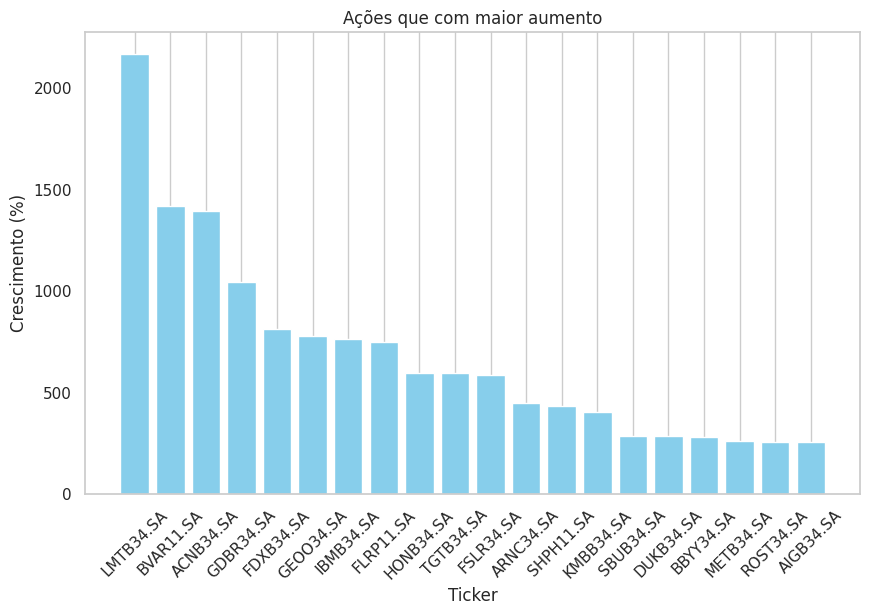

In [14]:
import pandas as pd

# Convertendo a coluna 'Data' para datetime
stock_price['Date'] = pd.to_datetime(stock_price['Date'])

# Ordenando o DataFrame por Ticker e Data
stock_price_sorted = stock_price.sort_values(by=['Ticker', 'Date'])

# Calculando o preço inicial e final de cada empresa (Ticker)
stock_price_sorted = stock_price_sorted.groupby('Ticker').agg(
    preco_inicio=('Close', 'first'),
    preco_fim=('Close', 'last')
)

# Calculando a variação do preço
stock_price_sorted['Crescimento'] = stock_price_sorted['preco_fim'] - stock_price_sorted['preco_inicio']

# Ordenando as empresas pela variação de preço em ordem decrescente e pegando as top 20
top_20 = stock_price_sorted.sort_values(by='Crescimento', ascending=False).head(20).reset_index()

print(top_20)
# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(top_20['Ticker'], top_20['Crescimento'], color='skyblue')
plt.xlabel('Ticker')
plt.ylabel('Crescimento (%)')
plt.title('Ações que com maior aumento')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

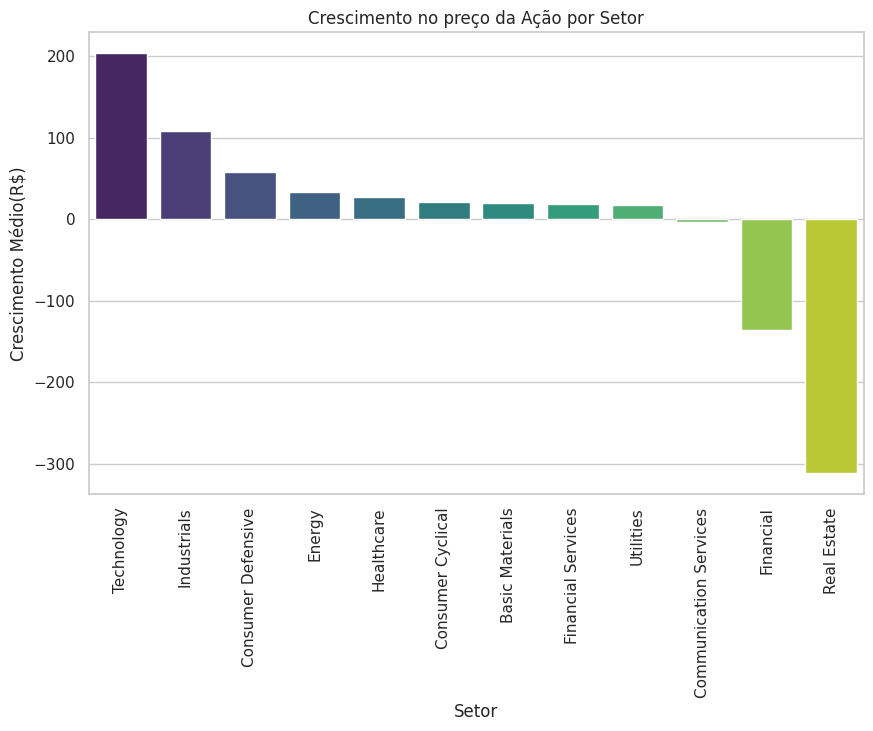

In [15]:
stock_price_sorted = stock_price_sorted.reset_index()
stock_price_sorted['Ticker'] = stock_price_sorted['Ticker'].str.replace('.SA', '', regex=False)

stock_merged_data = stock_price_sorted.merge(stock_info_df, on='Ticker')

# Calculando o crescimento médio por setor
sector_growth = stock_merged_data.groupby('Setor').agg(sector_change=('Crescimento', 'mean'))

# Setor com maior e menor crescimento
max_growth_sector = sector_growth.idxmax()
min_growth_sector = sector_growth.idxmin()

# print(max_growth_sector)
# print(min_growth_sector)

sector_growth = sector_growth.reset_index()

#Ordenando valores antes de plotar
sector_growth = sector_growth.sort_values(by='sector_change', ascending=False)

# Criando o gráfico de barras com seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Setor', y='sector_change', data=sector_growth, hue='Setor', dodge=False, palette='viridis', legend=False)

# Adicionando título e rótulos
plt.title('Crescimento no preço da Ação por Setor')
plt.xlabel('Setor')
plt.ylabel('Crescimento Médio(R$)')
plt.xticks(rotation=90)

# Exibindo o gráfico
plt.show()

In [16]:
stock_merged_data

,Ticker,preco_inicio,preco_fim,Crescimento,Nome,Setor,Indústria,Data
0,AALL34,161.580002,63.119999,-98.460003,American Airlines Group Inc.,Industrials,Airlines,1488805200
1,AALR3,13.250000,15.000000,1.750000,Alliança Saúde e Participações S.A.,Healthcare,Diagnostics & Research,1477656000
2,AAPL34,7.551250,61.680000,54.128750,Apple Inc.,Technology,Consumer Electronics,1329912000
3,ABBV34,21.427500,66.230003,44.802504,AbbVie Inc.,Healthcare,Drug Manufacturers - General,1465218000
4,ABCB4,16.659122,21.840000,5.180878,Banco ABC Brasil S.A.,Financial Services,Banks - Regional,1190811600
...,...,...,...,...,...,...,...,...
441,WLMM3,5.000000,28.090000,23.090000,WLM Participações e Comércio de Máquinas e Veí...,Consumer Cyclical,Auto & Truck Dealerships,1499432400
442,WLMM4,5.080000,31.000000,25.920000,WLM Participações e Comércio de Máquinas e Veí...,Consumer Cyclical,Auto & Truck Dealerships,946900800
443,WUNI34,65.940002,66.500000,0.559998,The Western Union Company,Financial Services,Credit Services,1442840400
444,XPCM11,94.709999,7.370000,-87.339999,XP Corporate Macaé Fundo de Investimento Imobi...,Real Estate,REIT - Diversified,1407330000


Com o gráfico acima, podemos validar que o setor com maior crescimento médio foi o de tecnologia, impulsionado em grande parte por empresas internacionais listadas na B3, como IBM, Cisco e Oracle, que tiveram grande valorização nos últimos 5 anos.

Outro ponto interessante é que o setor com o pior desempenho foi o de imóveis, algo que pode parecer contraintuitivo, já que muitos investidores consideram fundos imobiliários um investimento seguro. Ao analisar as ações listadas no setor imobiliário, chegamos à seguinte explicação para o resultado observado:

Primeiramente, existem fundos imobiliários com caráter determinado. Esses fundos são criados para arrecadar recursos para a construção de grandes obras e, uma vez que seu objetivo é alcançado e o lucro é distribuído aos seus acionistas, seu valor tende a cair para próximo de zero, impactando negativamente a média das ações do setor. Além disso, muitos fundos imobiliários, especialmente os menores, acabam sendo adquiridos por fundos maiores. Nesse processo, os imóveis mais valiosos geralmente são transferidos para os fundos maiores, enquanto os imóveis que permanecem com os fundos menores tendem a ter menor valor. Isso pode resultar na desvalorização dos fundos menores, impactando o desempenho geral do setor imobiliário.

[Text(0, 0, 'LMTB34'), Text(1, 0, 'GDBR34'), Text(2, 0, 'FDXB34')]
[Text(0, 0, 'ACNB34'), Text(1, 0, 'IBMB34'), Text(2, 0, 'FSLR34')]
[Text(0, 0, 'FMXB34'), Text(1, 0, 'KMBB34'), Text(2, 0, 'TGTB34')]
[Text(0, 0, 'FIIB11'), Text(1, 0, 'FPNG11'), Text(2, 0, 'SHPH11')]
[Text(0, 0, 'SBUB34'), Text(1, 0, 'BBYY34'), Text(2, 0, 'ROST34')]
[Text(0, 0, 'DUKB34'), Text(1, 0, 'ENMT3'), Text(2, 0, 'CGAS3')]
[Text(0, 0, 'METB34'), Text(1, 0, 'AIGB34'), Text(2, 0, 'BONY34')]
[Text(0, 0, 'USSX34'), Text(1, 0, 'DDNB34'), Text(2, 0, 'FCXO34')]
[Text(0, 0, 'HALI34'), Text(1, 0, 'EXXO34'), Text(2, 0, 'VLOE34')]
[Text(0, 0, 'GILD34'), Text(1, 0, 'LILY34'), Text(2, 0, 'MDTC34')]
[Text(0, 0, 'HGPO11'), Text(1, 0, 'HBTS5'), Text(2, 0, 'HGLG11')]
[Text(0, 0, 'GOGL35'), Text(1, 0, 'GOGL34'), Text(2, 0, 'NFLX34')]


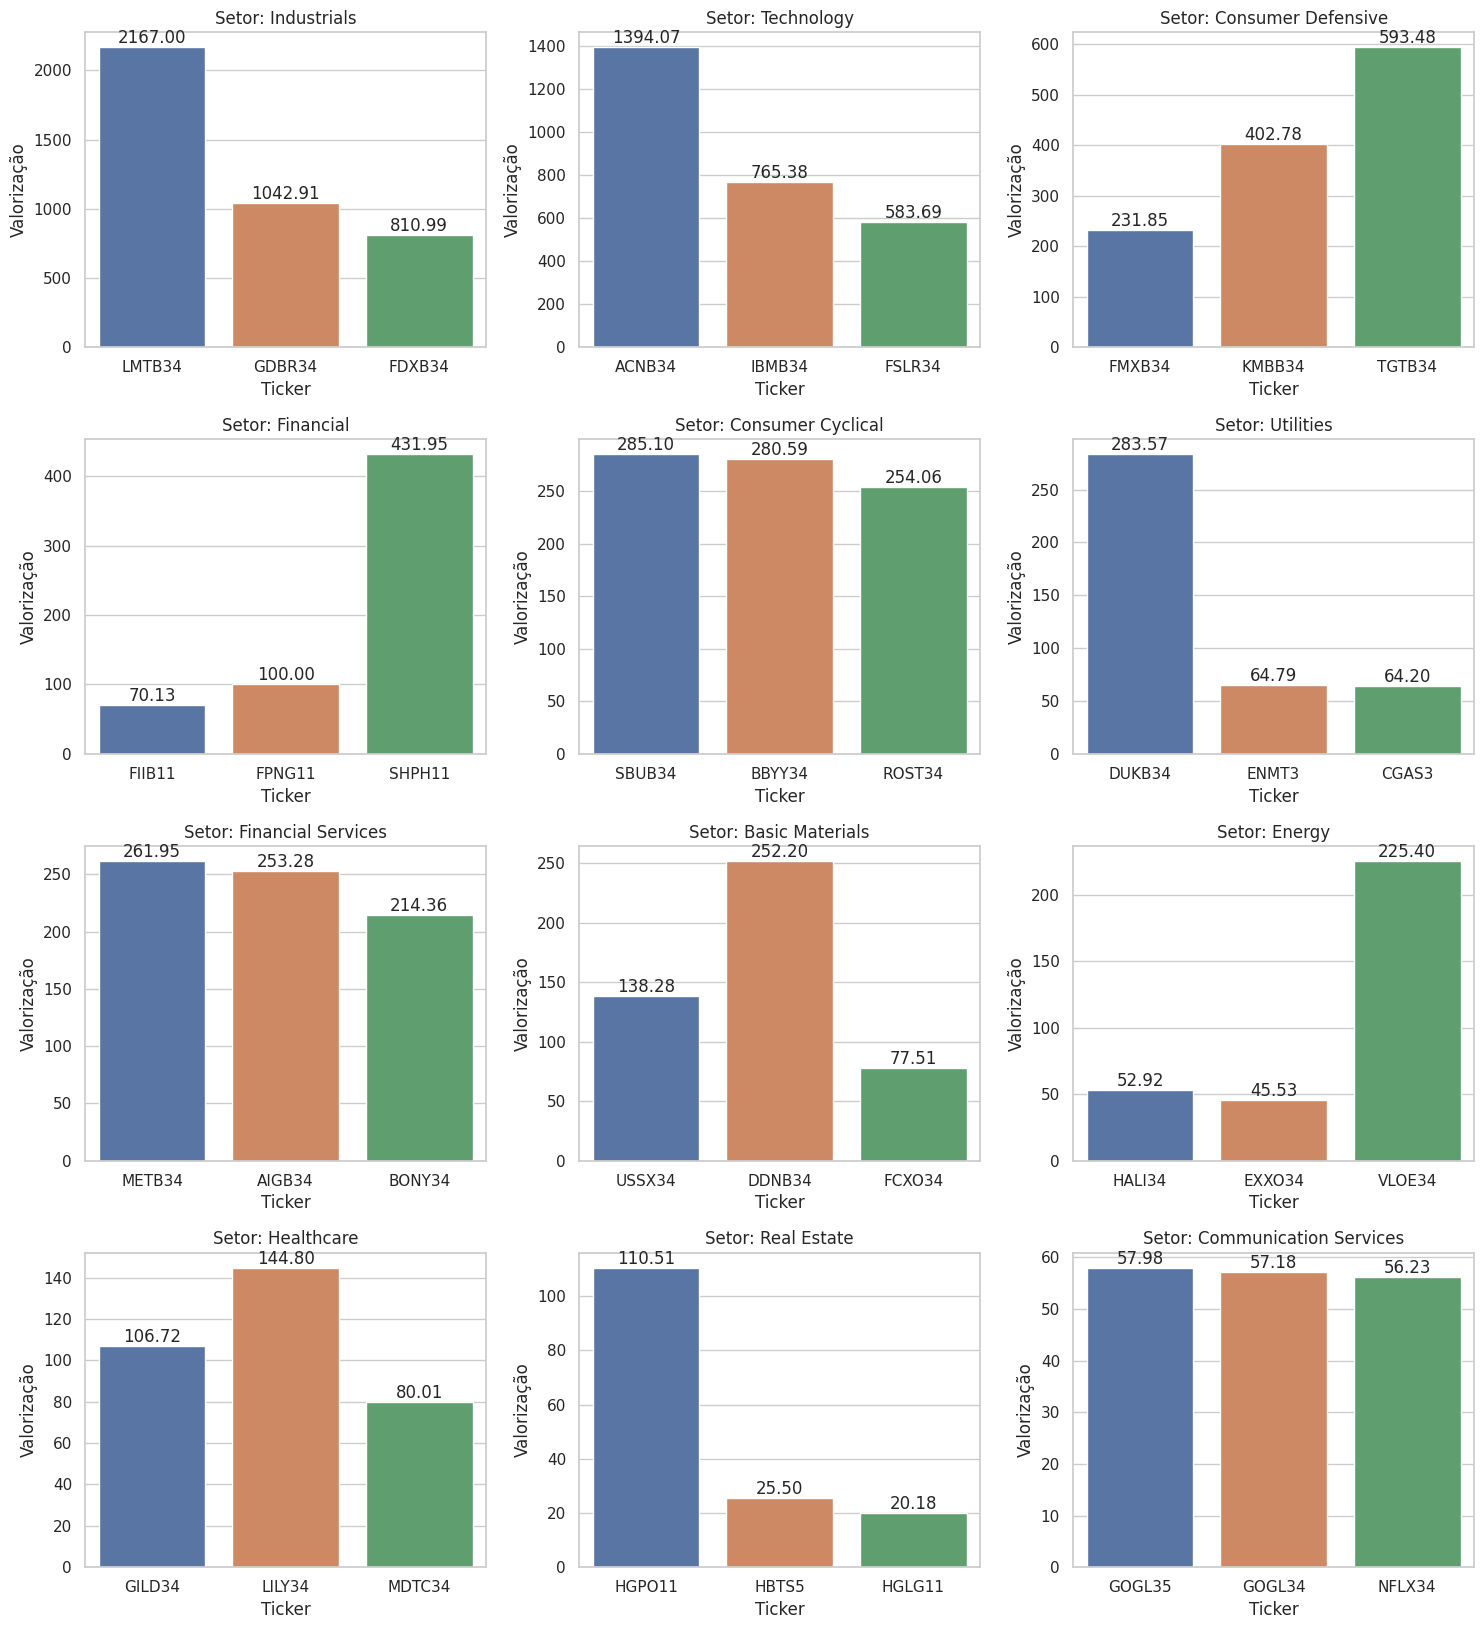

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


stock_merged_data['Valorização'] = stock_merged_data['Crescimento']
stock_merged_data_sorted = stock_merged_data.sort_values(by='Crescimento', ascending=False)

top3_por_setor = stock_merged_data_sorted.groupby('Setor').head(3)
# print(top3_por_setor)

top3_por_setor['Setor'] = pd.Categorical(top3_por_setor['Setor'], categories=top3_por_setor['Setor'].unique(), ordered=True)
df_sorted = top3_por_setor.sort_values(by='Setor')

# Get the unique sectors
sectors = df_sorted['Setor'].unique()

# Create subplots with the number of sectors
fig, axes = plt.subplots(nrows=len(sectors)//3 + 1, ncols=3, figsize=(15, 20))  # Adjust nrows and ncols based on the sector count
axes = axes.flatten()

# Plot each sector in a separate subplot
for i, setor in enumerate(sectors):
    # Filter the data for the current sector
    df_sector = df_sorted[df_sorted['Setor'] == setor]

    # Plot on the corresponding subplot
    sns.barplot(x='Ticker', y='Valorização',hue='Ticker', data=df_sector, ax=axes[i])

    # Set the title to be the sector name
    axes[i].set_title(f'Setor: {setor}')

    # Annotate bars with ticker name and growth value
    for p in axes[i].patches:
        height = p.get_height()
        if height > 0:  # Only annotate positive bars
            axes[i].text(
                p.get_x() + p.get_width() / 2,
                height,
                f'{height:.2f}',
                ha='center',
                va='bottom'
            )

    # Rotate the x-tick labels for better readability
    print(axes[i].get_xticklabels())
    axes[i].set_xticklabels(axes[i].get_xticklabels(), ha='center')

# Remove any empty subplots (if there are fewer sectors than subplots)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for readability
plt.tight_layout()
plt.show()

In [18]:
stock_price

,index,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,0,2019-01-02,16.026621,16.736967,15.909851,16.659122,11.902557,587516.0,ABCB4.SA
1,1,2019-01-03,16.668854,16.688314,16.425583,16.639660,11.888650,383935.0,ABCB4.SA
2,2,2019-01-04,16.629929,16.668854,16.435314,16.493698,11.784365,306244.0,ABCB4.SA
3,3,2019-01-07,16.493698,16.678583,16.445044,16.542353,11.819127,453508.0,ABCB4.SA
4,4,2019-01-08,16.591005,16.931583,16.445044,16.853739,12.041607,584741.0,ABCB4.SA
...,...,...,...,...,...,...,...,...,...
735583,735583,2024-09-23,1098.989990,1098.989990,1098.989990,1098.989990,1098.989990,0.0,RSPD11.SA
735584,735584,2024-09-24,1098.989990,1098.989990,1098.989990,1098.989990,1098.989990,0.0,RSPD11.SA
735585,735585,2024-09-25,1098.989990,1098.989990,1098.989990,1098.989990,1098.989990,0.0,RSPD11.SA
735586,735586,2024-09-26,1098.989990,1098.989990,1098.989990,1098.989990,1098.989990,0.0,RSPD11.SA


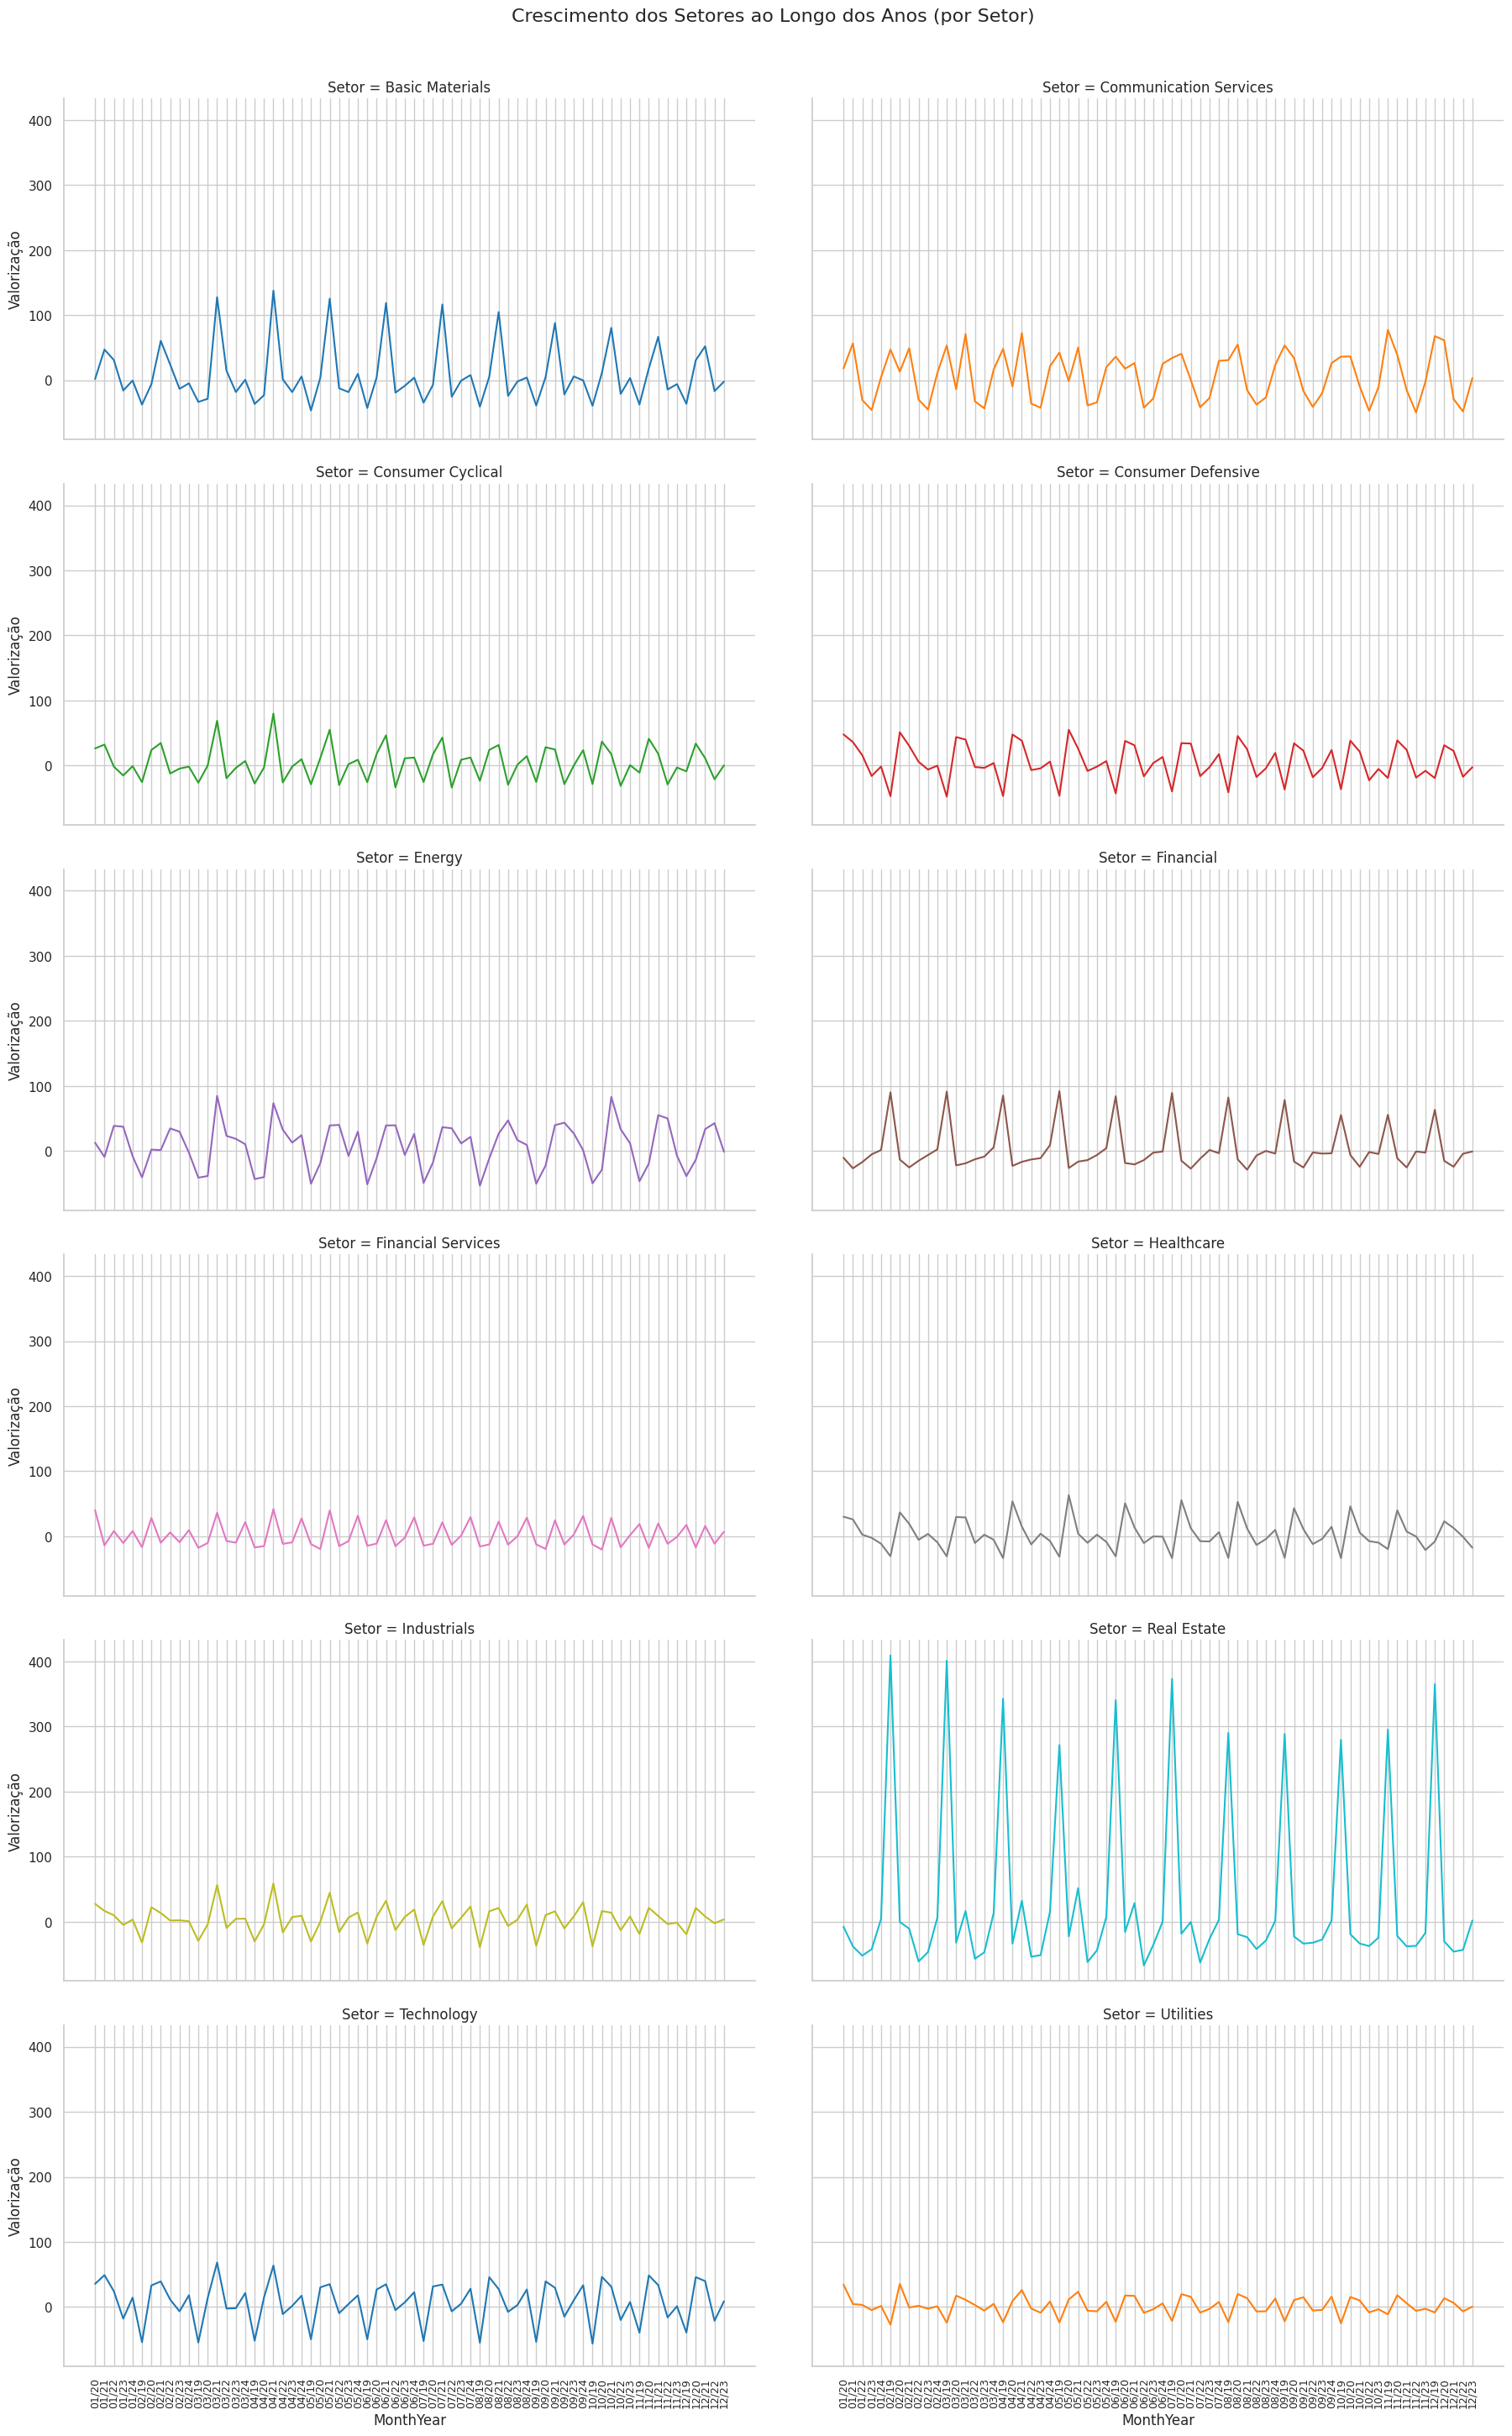

In [19]:
import seaborn as sns

stock_merged_data2 = stock_price
stock_merged_data2['Ticker'] = stock_merged_data2['Ticker'].str.replace('.SA', '', regex=False)
stock_merged_data2 = stock_merged_data2.merge(stock_info_df, on='Ticker')

# Agrupar por 'Setor' e 'MonthYear', a criação do MonthYear foi para reduzir o ruido e deixar os graficos mais legiveis
stock_merged_data2['MonthYear'] = stock_merged_data2['Date'].dt.strftime('%m/%y')
sector_growth = stock_merged_data2.groupby(['Setor', 'MonthYear'])['Close'].mean().reset_index()

# Calcular o crescimento percentual ano a ano
sector_growth['Valorização'] = sector_growth.groupby('Setor')['Close'].pct_change() * 100

# Remover valores nulos (pois o primeiro ano de cada setor não terá crescimento)
sector_growth = sector_growth.dropna()

colors = sns.color_palette("tab10", len(sector_growth['Setor'].unique()))
g = sns.FacetGrid(sector_growth, col='Setor', col_wrap=2, height=6, aspect=1.5)

for ax, color, sector in zip(g.axes.flat, colors, sector_growth['Setor'].unique()):
    subset = sector_growth[sector_growth['Setor'] == sector]
    sns.lineplot(x='MonthYear', y='Valorização', data=subset, ax=ax, color=color)
    ax.tick_params(axis='x', labelrotation = 90, labelsize=9)

plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(top=.95)
g.fig.suptitle('Crescimento dos Setores ao Longo dos Anos (por Setor)', fontsize=16)
plt.show()

Após responder as cinco questões propostas e gerar visulizações para melhor compreender nossos dados, podemos avançar para a fase de ajustes e finalização do pré-processamento dos dados.

# Pré-processamento de dados:

Nesse ponto, focaremos nas transformações essenciais na etapa de preparação dos dados, como a conversão de atributos de um tipo para outro, discretização de variáveis contínuas, normalização e padronização dos dados. Essas etapas são fundamentais para melhorar a qualidade e a consistência dos dados, garantindo que estejam prontos para a análise e modelagem subsequentes.

In [20]:
# Para utilizar os dados coletados para treino vamos primeiramente fazer um merge das informação similarmente ao que foi feito durante algumas etapas da visualização dos dados. Formando uma base de dados unica.
stock_data = stock_price
stock_data['Ticker'] = stock_data['Ticker'].str.replace('.SA', '', regex=False)
stock_data = stock_data.merge(stock_info_df, on='Ticker')
stock_data = stock_data.reset_index()

stock_data

,level_0,index,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Nome,Setor,Indústria,Data
0,0,0,2019-01-02,16.026621,16.736967,15.909851,16.659122,11.902557,587516.0,ABCB4,Banco ABC Brasil S.A.,Financial Services,Banks - Regional,1190811600
1,1,1,2019-01-03,16.668854,16.688314,16.425583,16.639660,11.888650,383935.0,ABCB4,Banco ABC Brasil S.A.,Financial Services,Banks - Regional,1190811600
2,2,2,2019-01-04,16.629929,16.668854,16.435314,16.493698,11.784365,306244.0,ABCB4,Banco ABC Brasil S.A.,Financial Services,Banks - Regional,1190811600
3,3,3,2019-01-07,16.493698,16.678583,16.445044,16.542353,11.819127,453508.0,ABCB4,Banco ABC Brasil S.A.,Financial Services,Banks - Regional,1190811600
4,4,4,2019-01-08,16.591005,16.931583,16.445044,16.853739,12.041607,584741.0,ABCB4,Banco ABC Brasil S.A.,Financial Services,Banks - Regional,1190811600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632300,632300,729650,2024-09-23,3.870000,3.870000,3.790000,3.830000,3.830000,360800.0,BMGB4,Banco BMG S.A.,Financial Services,Banks - Regional,1575032400
632301,632301,729651,2024-09-24,3.830000,3.860000,3.800000,3.810000,3.810000,326000.0,BMGB4,Banco BMG S.A.,Financial Services,Banks - Regional,1575032400
632302,632302,729652,2024-09-25,3.810000,3.850000,3.770000,3.780000,3.780000,368600.0,BMGB4,Banco BMG S.A.,Financial Services,Banks - Regional,1575032400
632303,632303,729653,2024-09-26,3.780000,3.830000,3.780000,3.790000,3.790000,330600.0,BMGB4,Banco BMG S.A.,Financial Services,Banks - Regional,1575032400


Primeiramente vamos começar removendo as colunas level_0 e index que foram introduzidas durante o processo de formação da base. Visto que esses indexes não tem relevancia para nossa base e futuro treinamento. Além delas, vamos remover a coluna Nome, pois acreito que não tem um valor siginificativo para o treinamento de um modelo que deseja prever o variação de ações com base em seu setores.

In [21]:
stock_data = stock_data.drop(['level_0', 'index', "Nome"], axis=1)
stock_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Ticker',
       'Setor', 'Indústria', 'Data'],
      dtype='object')

Em seguida vamos remover possiveis registros repetidos

In [22]:
stock_data.drop_duplicates(inplace=True)
stock_data.dropna(inplace=True)

Próximo passo é converter e renomear as colunas Date e Data para datetime e renomea-las para facilitar a compreenção dos seu significado.

In [23]:
stock_data["Data Entrada B3"] = pd.to_datetime(stock_data["Data"], unit='s')
stock_data["Data Negociacao B3"] = pd.to_datetime(stock_data["Date"])

stock_data = stock_data.drop(['Data', 'Date'], axis=1)

stock_data

,Open,High,Low,Close,Adj Close,Volume,Ticker,Setor,Indústria,Data Entrada B3,Data Negociacao B3
0,16.026621,16.736967,15.909851,16.659122,11.902557,587516.0,ABCB4,Financial Services,Banks - Regional,2007-09-26 13:00:00,2019-01-02
1,16.668854,16.688314,16.425583,16.639660,11.888650,383935.0,ABCB4,Financial Services,Banks - Regional,2007-09-26 13:00:00,2019-01-03
2,16.629929,16.668854,16.435314,16.493698,11.784365,306244.0,ABCB4,Financial Services,Banks - Regional,2007-09-26 13:00:00,2019-01-04
3,16.493698,16.678583,16.445044,16.542353,11.819127,453508.0,ABCB4,Financial Services,Banks - Regional,2007-09-26 13:00:00,2019-01-07
4,16.591005,16.931583,16.445044,16.853739,12.041607,584741.0,ABCB4,Financial Services,Banks - Regional,2007-09-26 13:00:00,2019-01-08
...,...,...,...,...,...,...,...,...,...,...,...
632300,3.870000,3.870000,3.790000,3.830000,3.830000,360800.0,BMGB4,Financial Services,Banks - Regional,2019-11-29 13:00:00,2024-09-23
632301,3.830000,3.860000,3.800000,3.810000,3.810000,326000.0,BMGB4,Financial Services,Banks - Regional,2019-11-29 13:00:00,2024-09-24
632302,3.810000,3.850000,3.770000,3.780000,3.780000,368600.0,BMGB4,Financial Services,Banks - Regional,2019-11-29 13:00:00,2024-09-25
632303,3.780000,3.830000,3.780000,3.790000,3.790000,330600.0,BMGB4,Financial Services,Banks - Regional,2019-11-29 13:00:00,2024-09-26


Agora vamos garantir que os valores de Open,	High, Low, Close Adj, Close,	Volume são númericos

In [24]:
stock_data['Open'] = pd.to_numeric(stock_data['Open'])
stock_data['High'] = pd.to_numeric(stock_data['High'])
stock_data['Low'] = pd.to_numeric(stock_data['Low'])
stock_data['Adj Close'] = pd.to_numeric(stock_data['Adj Close'], errors='coerce')
stock_data['Close'] = pd.to_numeric(stock_data['Close'])
stock_data['Volume'] = pd.to_numeric(stock_data['Volume'])

stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,Ticker,Setor,Indústria,Data Entrada B3,Data Negociacao B3
0,16.026621,16.736967,15.909851,16.659122,11.902557,587516.0,ABCB4,Financial Services,Banks - Regional,2007-09-26 13:00:00,2019-01-02
1,16.668854,16.688314,16.425583,16.639660,11.888650,383935.0,ABCB4,Financial Services,Banks - Regional,2007-09-26 13:00:00,2019-01-03
2,16.629929,16.668854,16.435314,16.493698,11.784365,306244.0,ABCB4,Financial Services,Banks - Regional,2007-09-26 13:00:00,2019-01-04
3,16.493698,16.678583,16.445044,16.542353,11.819127,453508.0,ABCB4,Financial Services,Banks - Regional,2007-09-26 13:00:00,2019-01-07
4,16.591005,16.931583,16.445044,16.853739,12.041607,584741.0,ABCB4,Financial Services,Banks - Regional,2007-09-26 13:00:00,2019-01-08


Agora vamos introduzir uma coluna nova relevante para o treinamento do modelo supervisionado, uma coluna chamada resultado que representará se devemos ou não ter comprado a ação naquele dia.

In [37]:
stock_data = stock_data.sort_values(by=['Ticker', 'Data Negociacao B3'])

# Step 2: Group by 'Ticker' and shift the 'Close' column by -1 within each group
stock_data['Tomorrow_Close'] = stock_data['Adj Close'].shift(-1)

# Step 3: Create the 'resultado' column (1 if tomorrow's Close is greater than today's, 0 otherwise)
stock_data['resultado'] = (stock_data['Tomorrow_Close'] > stock_data['Close']).astype(int)

# Step 4: Drop the 'Tomorrow_Close' column (optional)
stock_data = stock_data.drop(columns=['Tomorrow_Close'])

# print(stock_data[(stock_data['Ticker'] == 'AALL34') & (stock_data['Data Negociacao B3'] == '2019-10-09')])
# print(stock_data[(stock_data['Ticker'] == 'AALL34') & (stock_data['Data Negociacao B3'] == '2019-10-08')])

Próxima etapa é normailizar nossos valores númericos, como um dos nosso objetivos é treinar um modelo para fazer predições, a normalização pode levar a uma convergência mais rápida durante o treinamento, principalmente para algoritmos baseados em gradiente descendente, como regressão linear e redes neurais.

In [38]:
scaler = MinMaxScaler()
stock_data[['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume']] = scaler.fit_transform(stock_data[['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume']])

stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,Ticker,Setor,Indústria,Data Entrada B3,Data Negociacao B3,resultado
511371,0.014125,0.013425,0.014376,0.01425,0.015266,0.0,AALL34,Industrials,Airlines,2017-03-06 13:00:00,2019-01-02,0
511372,0.014125,0.013425,0.014376,0.01425,0.015266,0.0,AALL34,Industrials,Airlines,2017-03-06 13:00:00,2019-01-03,0
511373,0.014125,0.013425,0.014376,0.01425,0.015266,0.0,AALL34,Industrials,Airlines,2017-03-06 13:00:00,2019-01-04,0
511374,0.014125,0.013425,0.014376,0.01425,0.015266,0.0,AALL34,Industrials,Airlines,2017-03-06 13:00:00,2019-01-07,0
511375,0.014125,0.013425,0.014376,0.01425,0.015266,0.0,AALL34,Industrials,Airlines,2017-03-06 13:00:00,2019-01-08,0


Proximo passo é aplicar OneHotEncoding nas nossas variaveis categoricas Setor,
Indústria e Ticker. No entanto Indústria e Tickers possuem muitas categorias, o que estourou o limite de memoria do colabs. Logo para este caso vamos aplicar um label encoder para a coluna de indústria.

In [39]:
label_encoder = LabelEncoder()
stock_data['Indústria'] = label_encoder.fit_transform(stock_data['Indústria'])

In [40]:
# num_sectors = stock_data['Setor'].nunique()
# num_industries = stock_data['Indústria'].nunique()
# num_ticker = stock_data['Ticker'].nunique()

# print(f'Number of unique sectors: {num_ticker}')
# print(f'Number of unique sectors: {num_sectors}')
# print(f'Number of unique industries: {num_industries}')
# print(len(stock_data))

# Step 2: Apply One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(stock_data[['Ticker', 'Setor']])

# Create a DataFrame for the One-Hot Encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Ticker', 'Setor']))

# Combine the original DataFrame with the encoded features
final_df = pd.concat([stock_data, encoded_df], axis=1)

final_df.head()

,Open,High,Low,Close,Adj Close,Volume,Ticker,Setor,Indústria,Data Entrada B3,...,Setor_Consumer Cyclical,Setor_Consumer Defensive,Setor_Energy,Setor_Financial,Setor_Financial Services,Setor_Healthcare,Setor_Industrials,Setor_Real Estate,Setor_Technology,Setor_Utilities
511371,0.014125,0.013425,0.014376,0.01425,0.015266,0.0,AALL34,Industrials,2.0,2017-03-06 13:00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
511372,0.014125,0.013425,0.014376,0.01425,0.015266,0.0,AALL34,Industrials,2.0,2017-03-06 13:00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
511373,0.014125,0.013425,0.014376,0.01425,0.015266,0.0,AALL34,Industrials,2.0,2017-03-06 13:00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
511374,0.014125,0.013425,0.014376,0.01425,0.015266,0.0,AALL34,Industrials,2.0,2017-03-06 13:00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
511375,0.014125,0.013425,0.014376,0.01425,0.015266,0.0,AALL34,Industrials,2.0,2017-03-06 13:00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [43]:
final_df = final_df.drop(['Ticker', 'Setor'], axis=1)
final_df.head()

,Open,High,Low,Close,Adj Close,Volume,Indústria,Data Entrada B3,Data Negociacao B3,resultado,...,Setor_Consumer Cyclical,Setor_Consumer Defensive,Setor_Energy,Setor_Financial,Setor_Financial Services,Setor_Healthcare,Setor_Industrials,Setor_Real Estate,Setor_Technology,Setor_Utilities
511371,0.014125,0.013425,0.014376,0.01425,0.015266,0.0,2.0,2017-03-06 13:00:00,2019-01-02,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
511372,0.014125,0.013425,0.014376,0.01425,0.015266,0.0,2.0,2017-03-06 13:00:00,2019-01-03,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
511373,0.014125,0.013425,0.014376,0.01425,0.015266,0.0,2.0,2017-03-06 13:00:00,2019-01-04,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
511374,0.014125,0.013425,0.014376,0.01425,0.015266,0.0,2.0,2017-03-06 13:00:00,2019-01-07,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
511375,0.014125,0.013425,0.014376,0.01425,0.015266,0.0,2.0,2017-03-06 13:00:00,2019-01-08,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Agora, nosso conjunto de dados foi completamente processado e podemos utilizar o DataFrame ***final_df*** para treinar um modelo de previsão, tendo a coluna Resultado como a variável alvo (saída esperada). E assim, o modelo poderá decidir se devemos ou não adquirir a ação, indicando se o preço tende a subir ou não.